# Data Information for meta.csv

This markdown cell provides information about the `meta.csv` file in the TAU-urban-acoustic-scenes-2022-mobile-development archive.

The `meta.csv` file contains metadata about urban acoustic scenes, including information about the scene label, identifier, source label, and more.

Below are the details of the data analysis performed on the `meta.csv` file:

- Basic statistics: Descriptive statistics such as count, mean, standard deviation, minimum, and maximum values for numerical columns.
- Unique classes in the `scene_label` column: The unique values present in the `scene_label` column.
- Number of unique values: The count of unique values in each column.
- Number of values in each column: The count of non-null values in each column.
- Number of values for the `scene_label` column: The count of occurrences for each unique value in the `scene_label` column.
- Number of values for the `identifier` column: The count of occurrences for each unique value in the `identifier` column.
- Number of values for the `identifier` column, separated by `scene_label`: The count of occurrences for each unique value in the `identifier` column, grouped by the `scene_label` column.
- First 20 rows for the `identifier` value 'barcelona-1': The first 20 rows where the `identifier` column has the value 'barcelona-1'.
- First 10 rows for each `scene_label`: The first 10 rows for each unique value in the `scene_label` column.
- Plot of the number of values for the `scene_label` column: A bar plot showing the count of occurrences for each unique value in the `scene_label` column.
- Plot of the number of values for each `identifier` value, grouped by `scene_label`: Bar plots showing the count of occurrences for each unique value in the `identifier` column, grouped by the `scene_label` column.
- Count of values in the `source_label` column: The count of occurrences for each unique value in the `source_label` column.
- Percentage of values in the `source_label` column: The percentage of occurrences for each unique value in the `source_label` column.
- Plot of values for the `source_label` column: A bar plot showing the count of occurrences for each unique value in the `source_label` column.

Please note that the code snippets provided in the previous cells demonstrate how to perform these analyses using the `pandas` library in Python.



In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import  pandas as pd

In [43]:
pd = pd.read_csv('data/TAU-urban-acoustic-scenes-2022-mobile-development/meta.csv',sep = '\t')

print(pd.head())

                                  filename scene_label   identifier  \
0  audio/airport-lisbon-1000-40000-0-a.wav     airport  lisbon-1000   
1  audio/airport-lisbon-1000-40000-1-a.wav     airport  lisbon-1000   
2  audio/airport-lisbon-1000-40000-2-a.wav     airport  lisbon-1000   
3  audio/airport-lisbon-1000-40000-3-a.wav     airport  lisbon-1000   
4  audio/airport-lisbon-1000-40000-4-a.wav     airport  lisbon-1000   

  source_label  
0            a  
1            a  
2            a  
3            a  
4            a  


In [44]:
#Basic statistics
print(pd.describe())



                                   filename scene_label   identifier  \
count                                230350      230350       230350   
unique                               230350          10          514   
top     audio/tram-lyon-1103-43145-9-s6.wav         bus  barcelona-1   
freq                                      1       23040         1250   

       source_label  
count        230350  
unique            9  
top               a  
freq         144000  


In [45]:
#Name of unique classes in column scene_label
print(pd.scene_label.unique())

['airport' 'bus' 'metro' 'metro_station' 'park' 'public_square'
 'shopping_mall' 'street_pedestrian' 'street_traffic' 'tram']


In [46]:
#Number of unique values
print(pd.nunique())



filename        230350
scene_label         10
identifier         514
source_label         9
dtype: int64


In [47]:
#Number of values in each column
print(pd.count())



filename        230350
scene_label     230350
identifier      230350
source_label    230350
dtype: int64


In [48]:
#Number of values for column 'scene_label'
print(pd['scene_label'].value_counts())


scene_label
bus                  23040
metro                23040
street_traffic       23040
metro_station        23040
park                 23040
street_pedestrian    23040
shopping_mall        23030
public_square        23030
tram                 23030
airport              23020
Name: count, dtype: int64


In [49]:
#Number of values for column 'identifier'
print(pd['identifier'].value_counts())


identifier
barcelona-1    1250
london-256     1230
london-131     1080
milan-1084     1080
helsinki-45    1000
               ... 
prague-1071     100
lisbon-1106      90
lyon-1091        80
milan-1209       50
london-71        20
Name: count, Length: 514, dtype: int64


In [50]:
#Number of values for column 'identifier', separated by scene_label
print(pd.groupby('scene_label')['identifier'].value_counts())




scene_label  identifier 
airport      barcelona-1    1250
             helsinki-3      890
             vienna-13       890
             london-6        850
             helsinki-4      840
                            ... 
tram         paris-192       100
             prague-1161     100
             prague-1071     100
             lyon-1091        80
             milan-1209       50
Name: count, Length: 514, dtype: int64


In [51]:
# 20 rows
print(pd[pd['identifier'] == 'barcelona-1'].head(20))



                                  filename scene_label   identifier  \
3280  audio/airport-barcelona-1-16-0-a.wav     airport  barcelona-1   
3281  audio/airport-barcelona-1-16-1-a.wav     airport  barcelona-1   
3282  audio/airport-barcelona-1-16-2-a.wav     airport  barcelona-1   
3283  audio/airport-barcelona-1-16-3-a.wav     airport  barcelona-1   
3284  audio/airport-barcelona-1-16-4-a.wav     airport  barcelona-1   
3285  audio/airport-barcelona-1-16-5-a.wav     airport  barcelona-1   
3286  audio/airport-barcelona-1-16-6-a.wav     airport  barcelona-1   
3287  audio/airport-barcelona-1-16-7-a.wav     airport  barcelona-1   
3288  audio/airport-barcelona-1-16-8-a.wav     airport  barcelona-1   
3289  audio/airport-barcelona-1-16-9-a.wav     airport  barcelona-1   
3290  audio/airport-barcelona-1-17-0-a.wav     airport  barcelona-1   
3291  audio/airport-barcelona-1-17-1-a.wav     airport  barcelona-1   
3292  audio/airport-barcelona-1-17-2-a.wav     airport  barcelona-1   
3293  

In [52]:


# Get a dataframe with the first 10 rows FOR EACH scene_label and only those rows
print(pd.groupby('scene_label').head(10))


                                       filename scene_label   identifier  \
0       audio/airport-lisbon-1000-40000-0-a.wav     airport  lisbon-1000   
1       audio/airport-lisbon-1000-40000-1-a.wav     airport  lisbon-1000   
2       audio/airport-lisbon-1000-40000-2-a.wav     airport  lisbon-1000   
3       audio/airport-lisbon-1000-40000-3-a.wav     airport  lisbon-1000   
4       audio/airport-lisbon-1000-40000-4-a.wav     airport  lisbon-1000   
...                                         ...         ...          ...   
125835     audio/tram-lisbon-1035-40042-5-a.wav        tram  lisbon-1035   
125836     audio/tram-lisbon-1035-40042-6-a.wav        tram  lisbon-1035   
125837     audio/tram-lisbon-1035-40042-7-a.wav        tram  lisbon-1035   
125838     audio/tram-lisbon-1035-40042-8-a.wav        tram  lisbon-1035   
125839     audio/tram-lisbon-1035-40042-9-a.wav        tram  lisbon-1035   

       source_label  
0                 a  
1                 a  
2                 a  

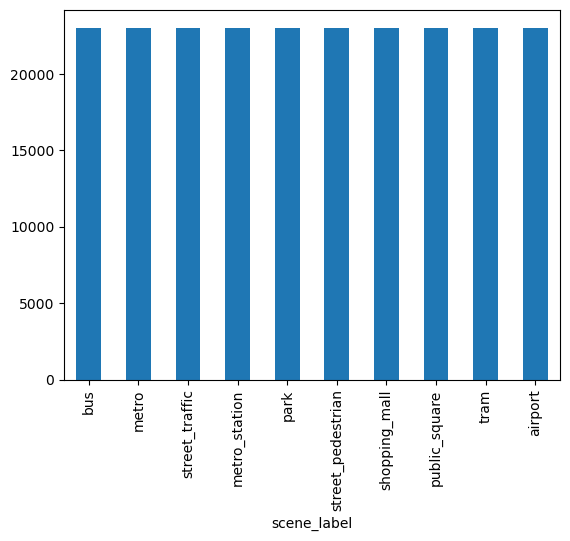

In [53]:

#Plot of the number of values for column "scene_label"
pd['scene_label'].value_counts().plot.bar()
plt.show()




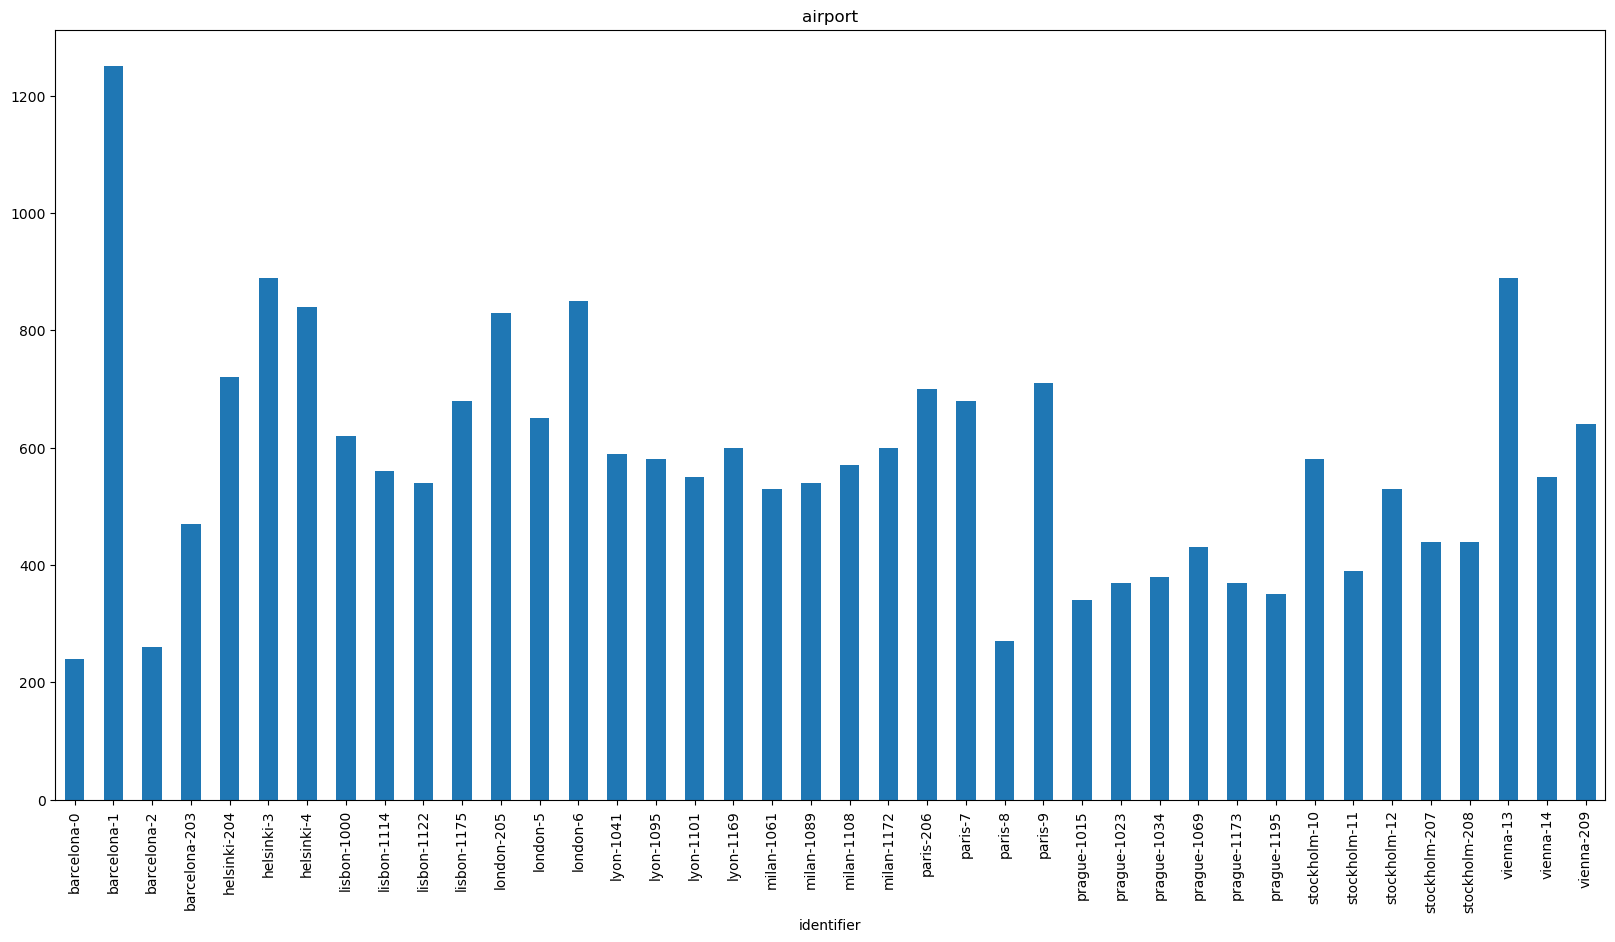

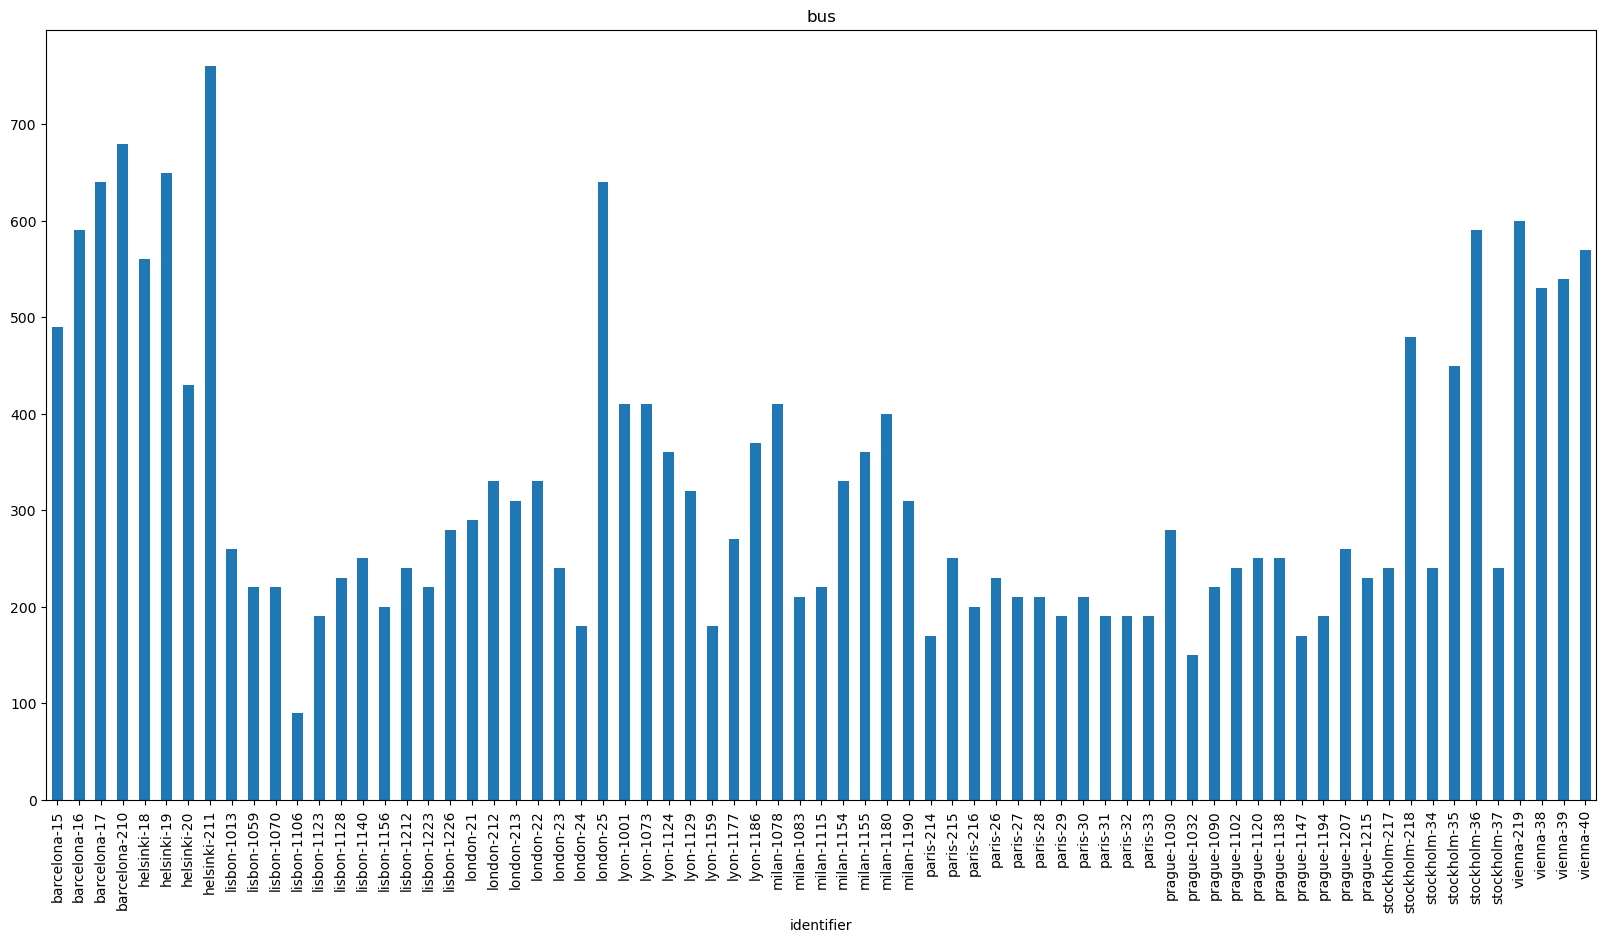

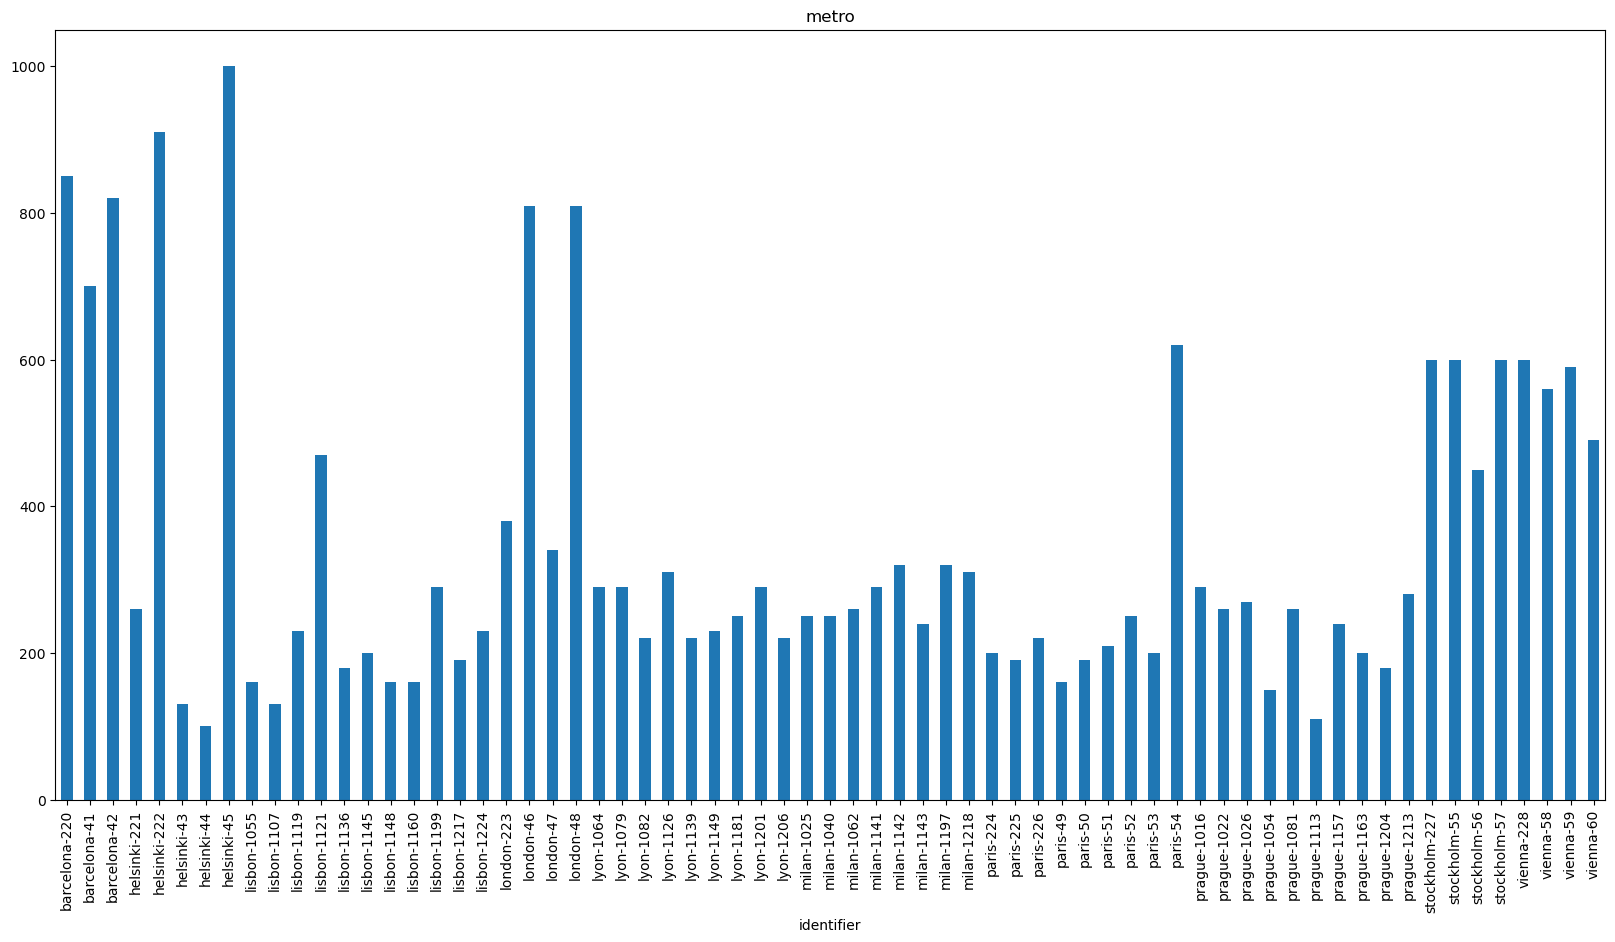

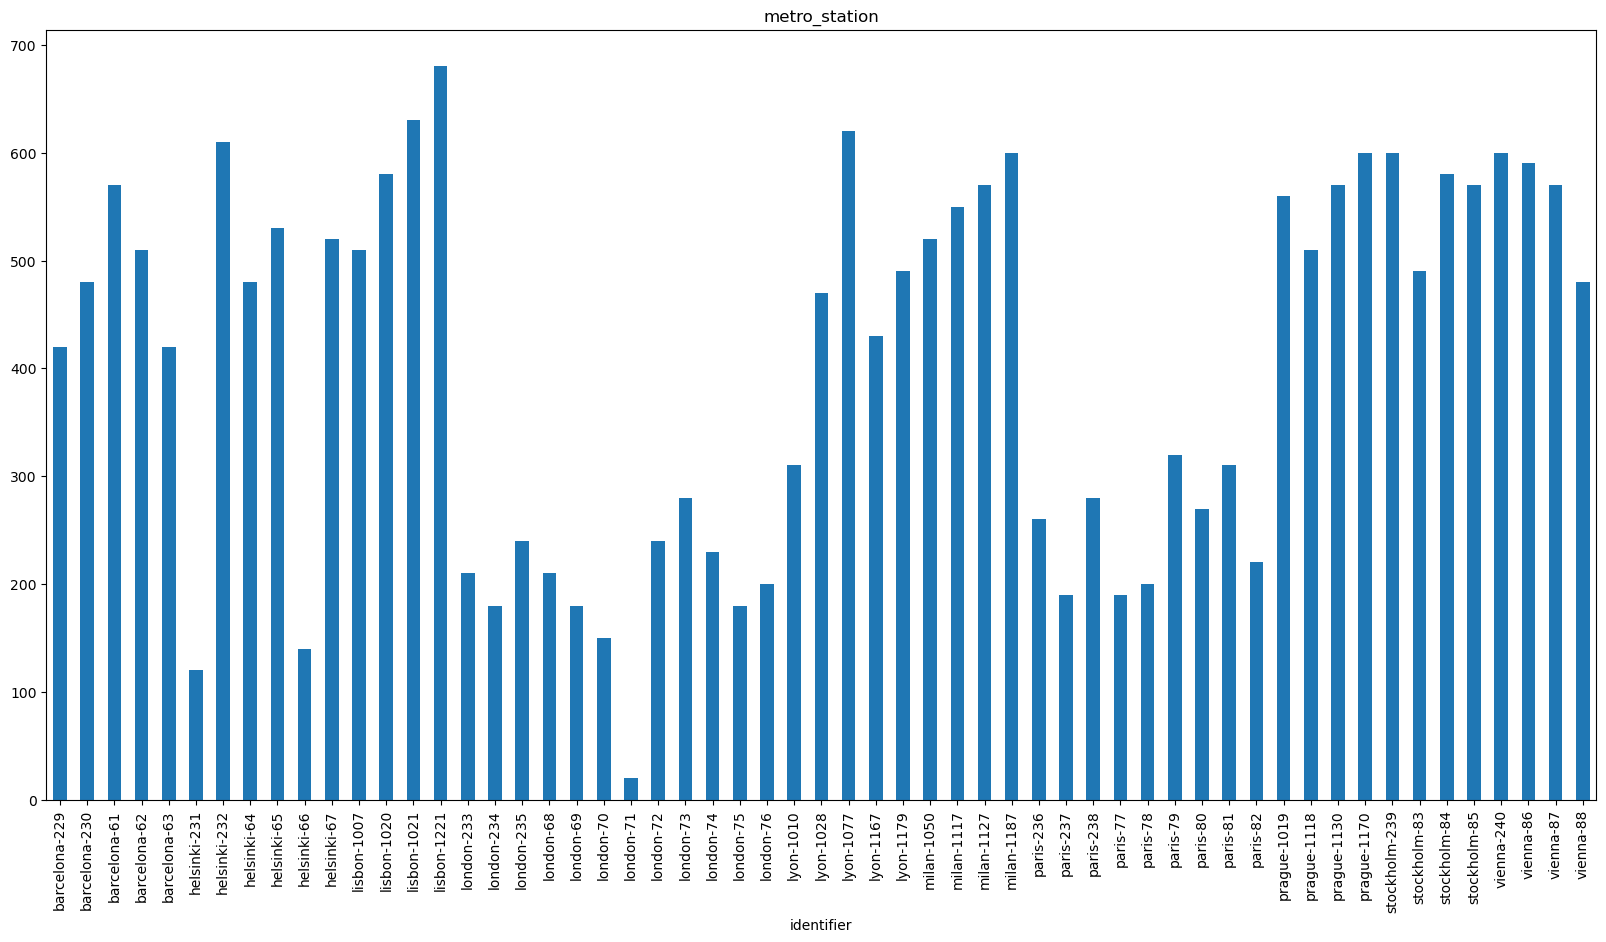

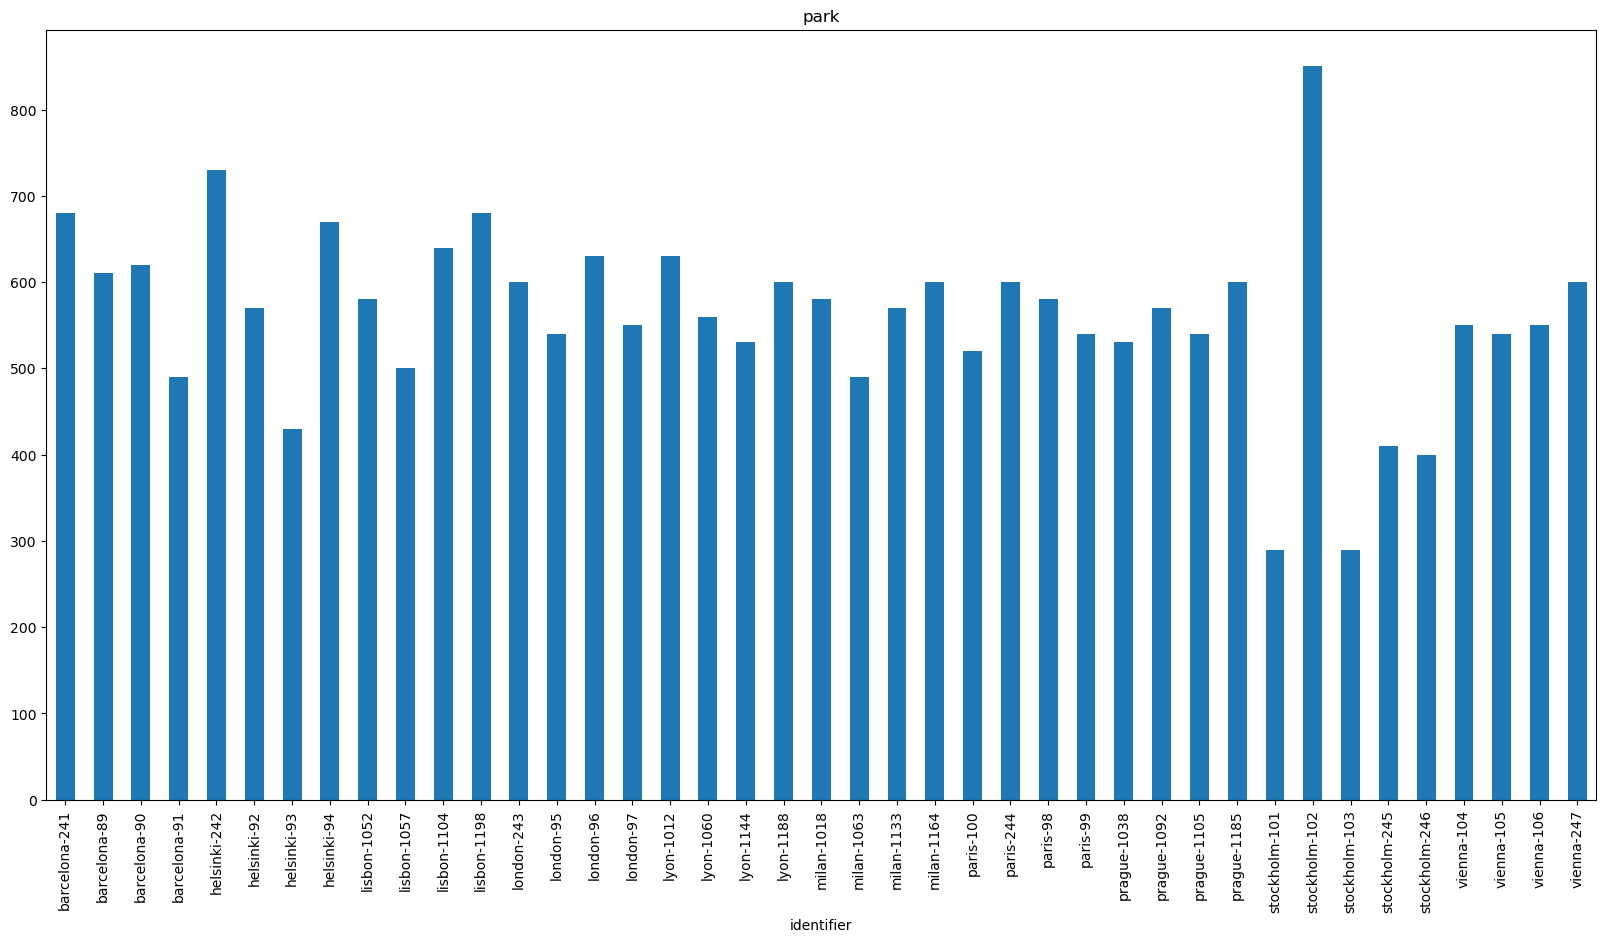

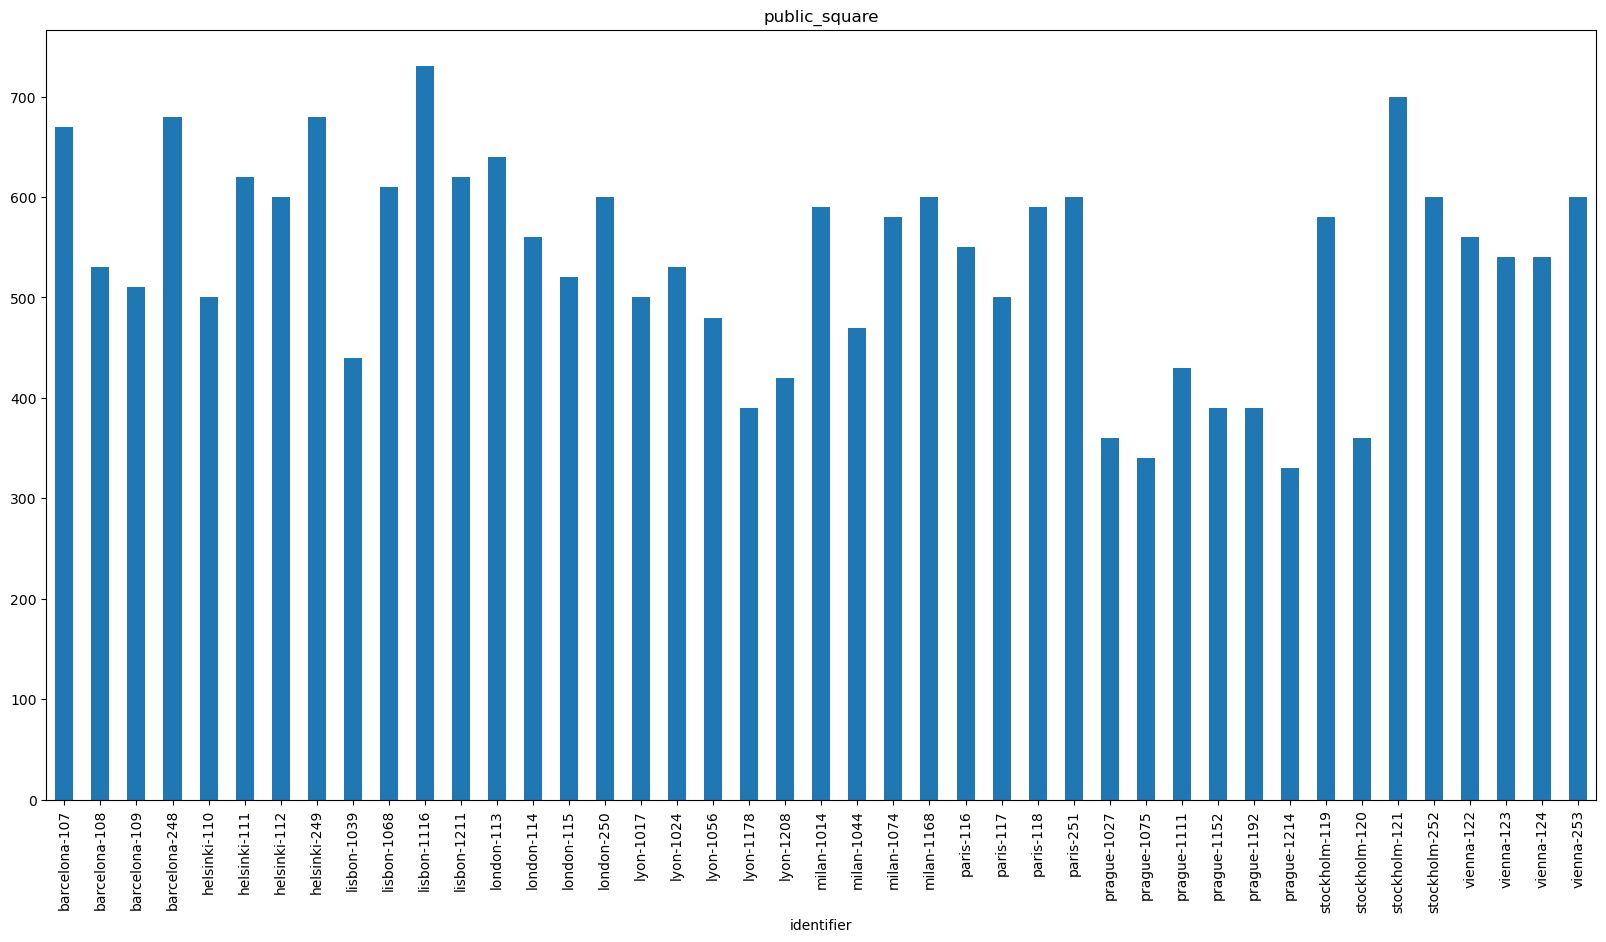

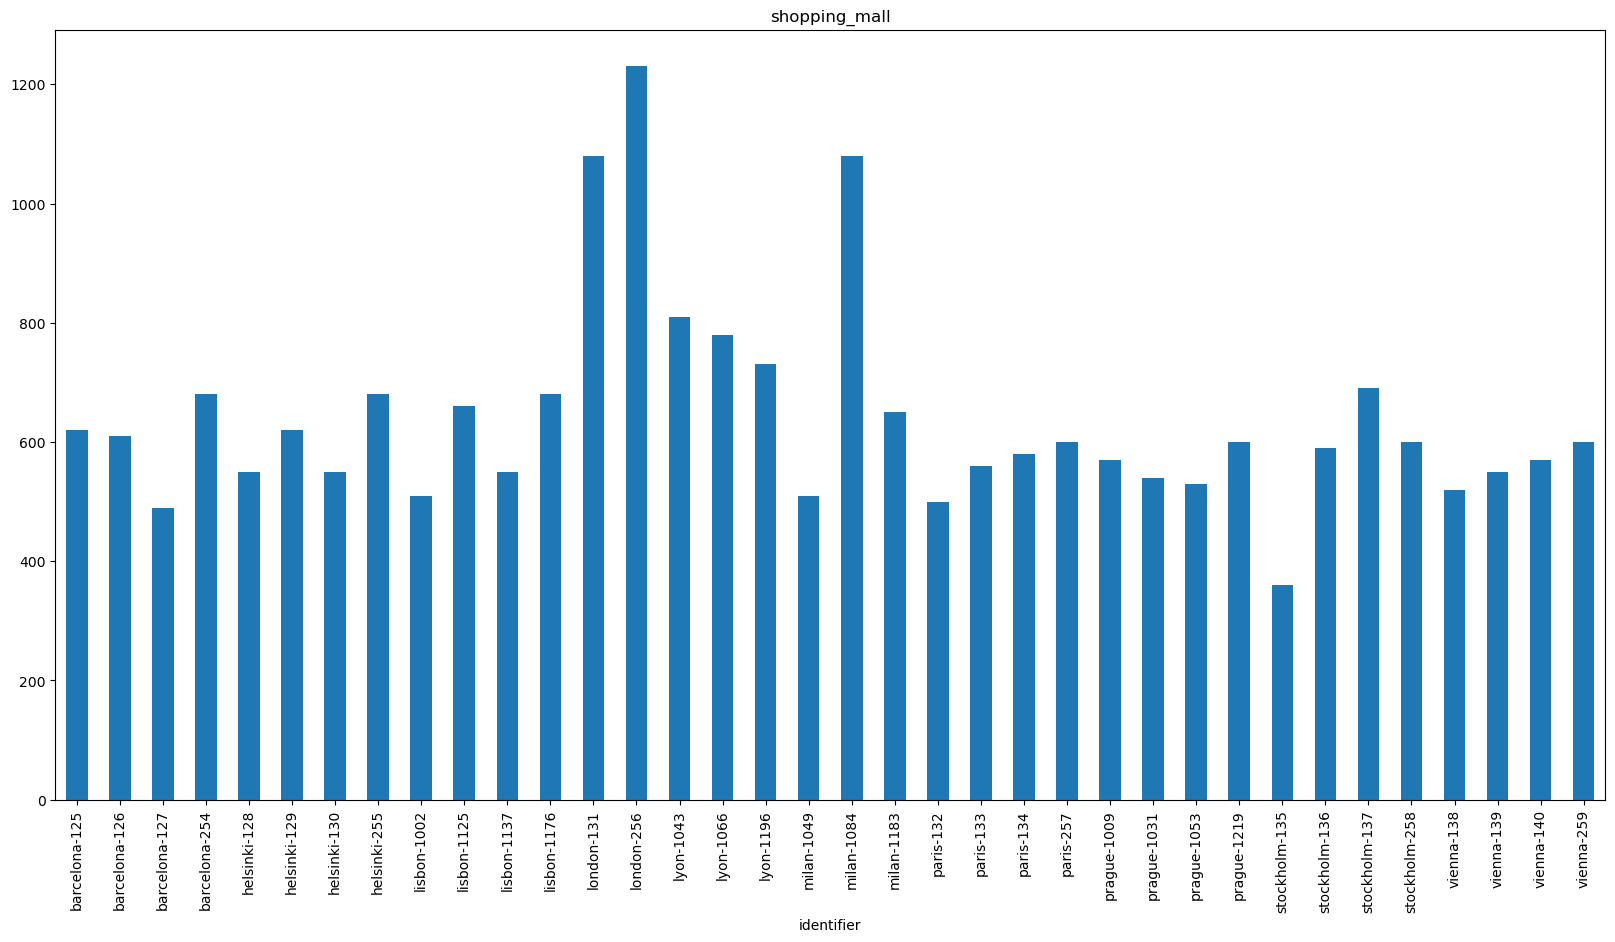

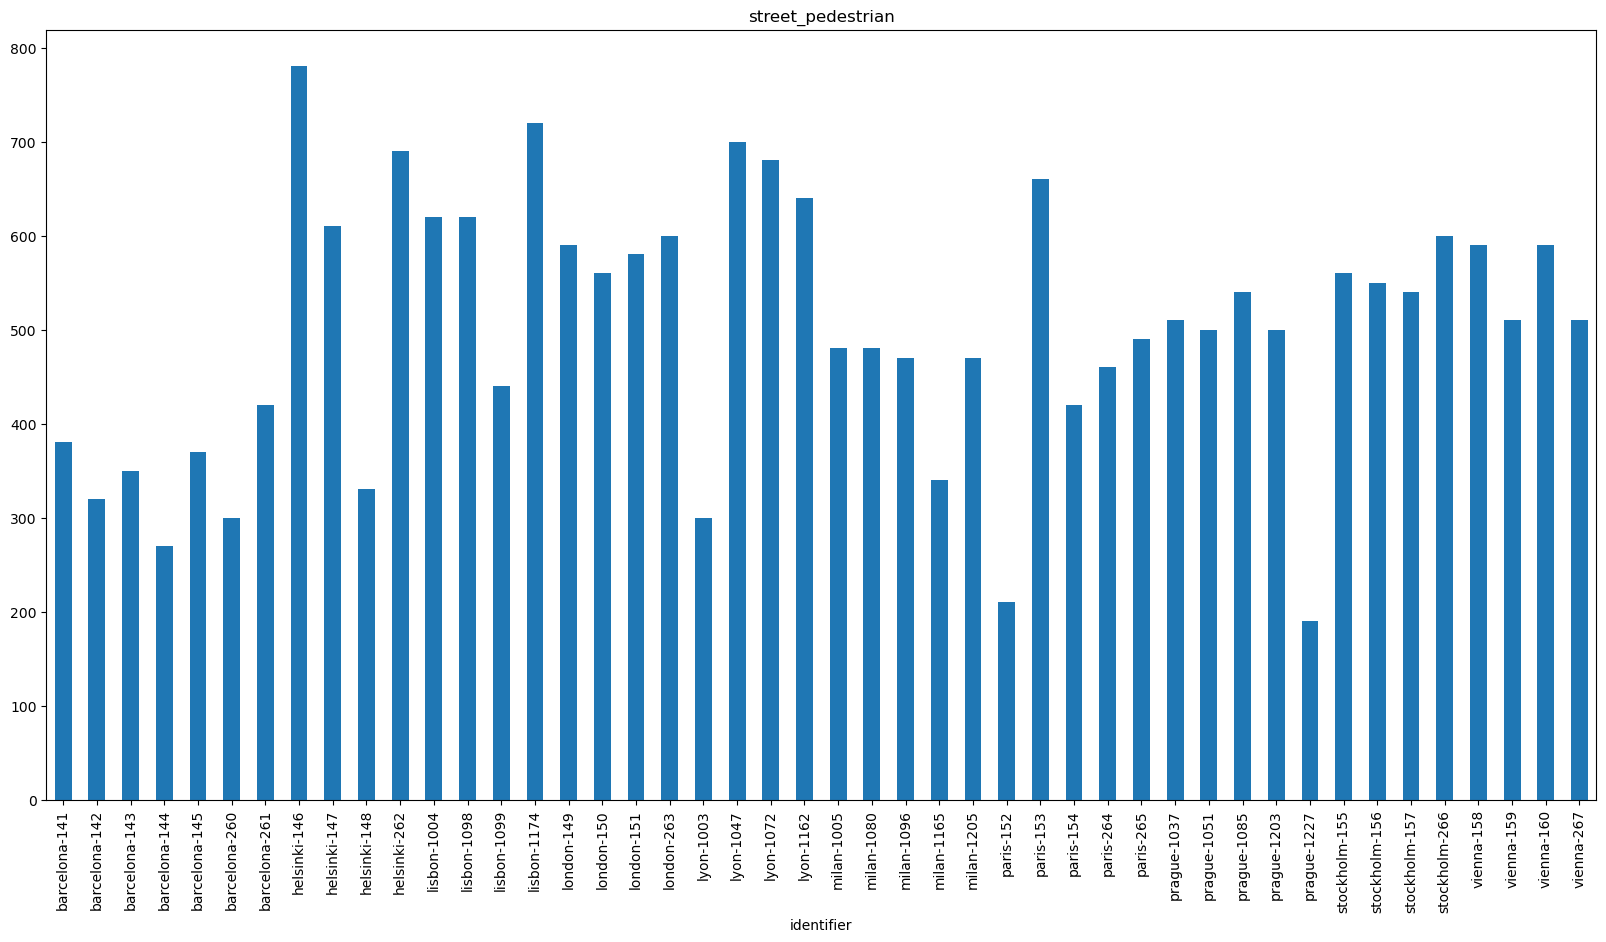

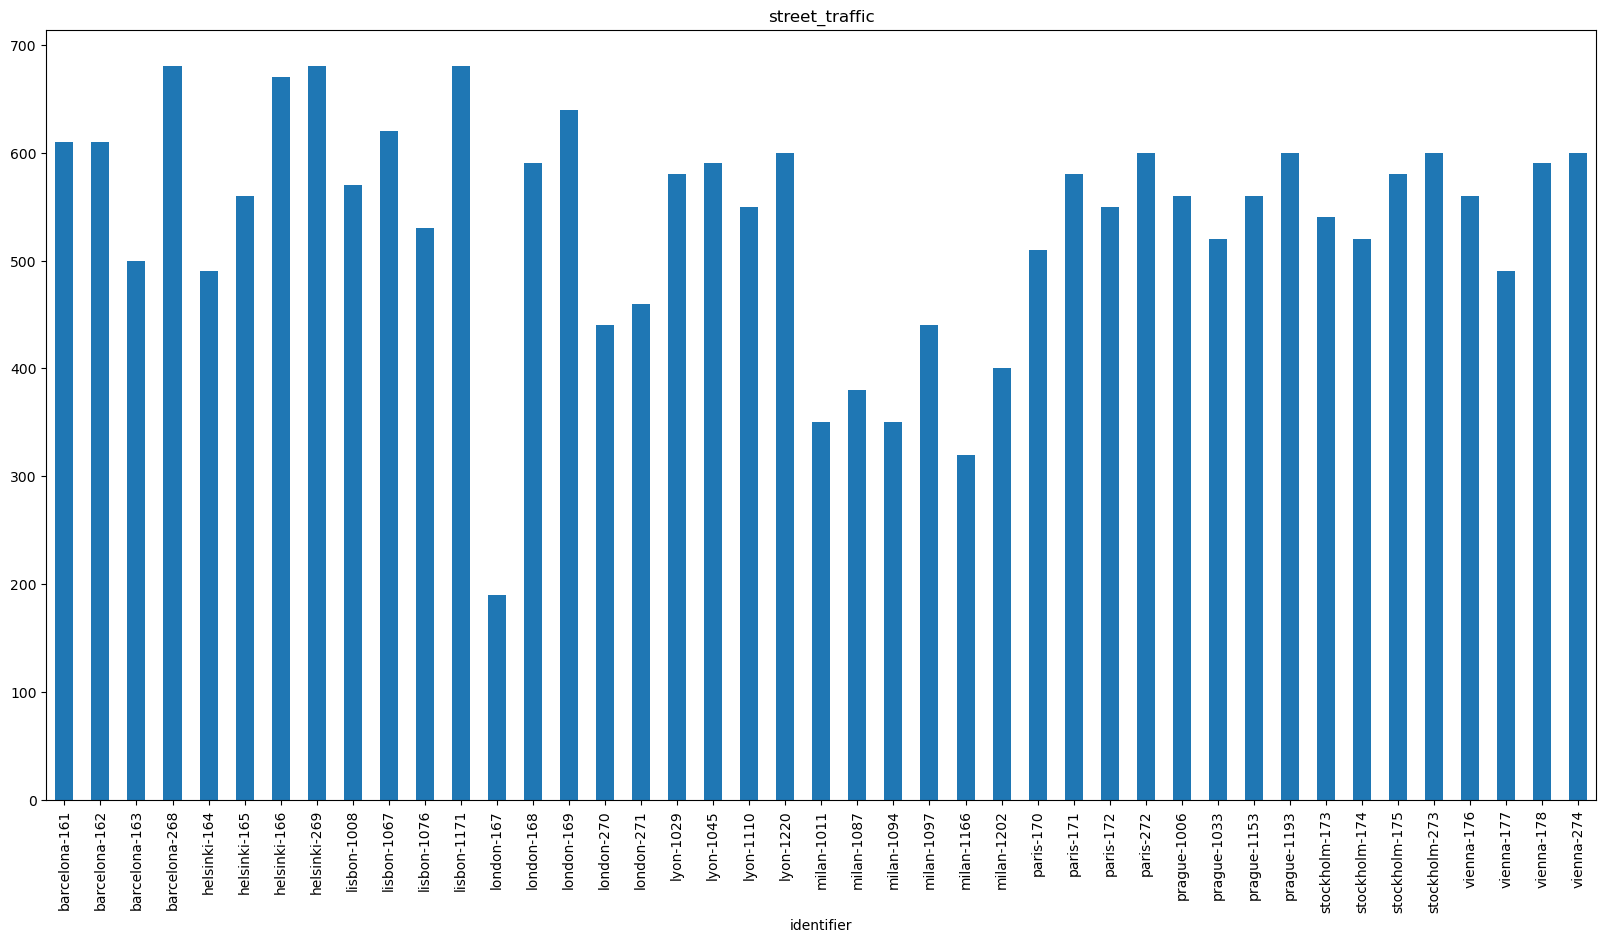

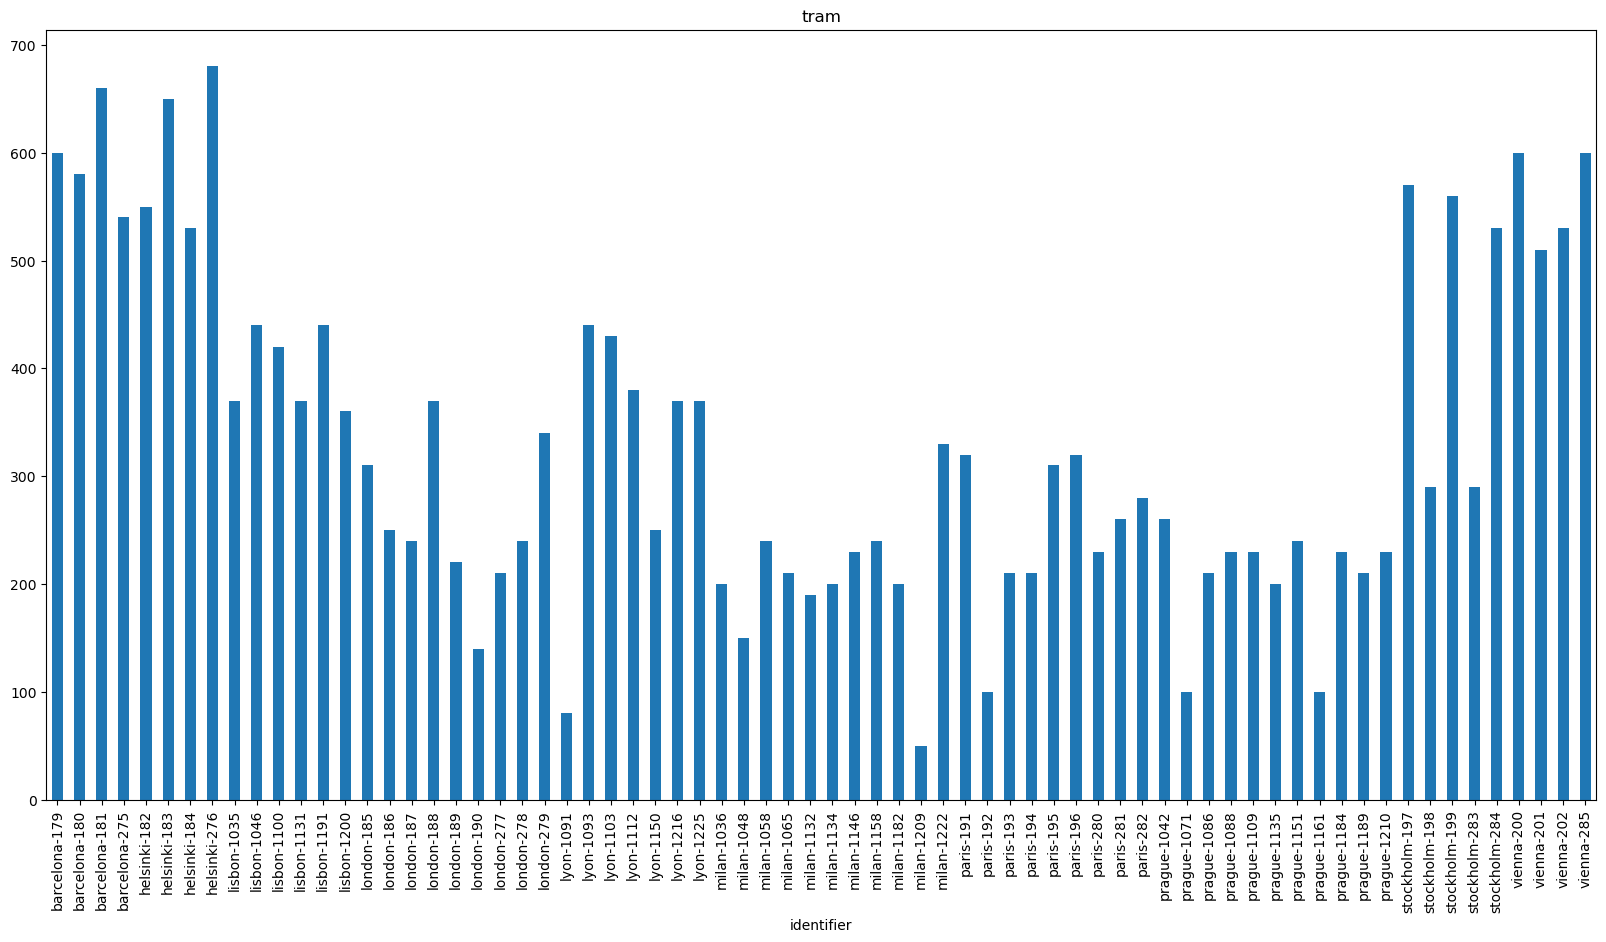

In [54]:

tags = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square', 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

for tag in tags:
    plt.figure(figsize=(20, 10))
    #Group by scene_label and identifier, and plot the number of values for each identifier na dhten plot
    pd[pd['scene_label'] == tag].groupby('identifier')['scene_label'].count().plot.bar()
    plt.title(tag)
    plt.show()
    


In [55]:
#Count of values in column "source_label"
print(pd['source_label'].value_counts())


source_label
a     144000
s2     10800
s1     10800
s4     10800
s3     10800
s5     10800
s6     10800
b      10780
c      10770
Name: count, dtype: int64


In [56]:
#Percentage of values in column "source_label" 
print(pd['source_label'].value_counts(normalize=True))


source_label
a     0.625136
s2    0.046885
s1    0.046885
s4    0.046885
s3    0.046885
s5    0.046885
s6    0.046885
b     0.046798
c     0.046755
Name: proportion, dtype: float64


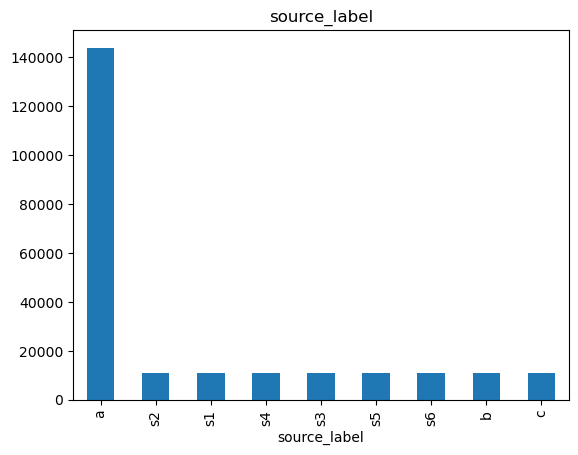

In [57]:
#Plot of values for source_label
pd['source_label'].value_counts().plot.bar()
plt.title('source_label')
plt.show()


# Data Analysis of fold1_train.csv

This markdown cell provides information about the `fold1_train.csv` file in the TAU-urban-acoustic-scenes-2022-mobile-development evaluation setup.

The `fold1_train.csv` file contains training data for urban acoustic scenes, including information about the scene label.

## Basic Information

- File Path: `/data/TAU-urban-acoustic-scenes-2022-mobile-development/evaluation_setup/fold1_train.csv`
- Separator: `\t`

## Data Analysis (scene label)

- Number of Counts: 139620
- Number of Unique: 10
- Top Count: 14290 (Park)

### Scene Label Distribution

The bar plot below represents the distribution of scene labels in the `fold1_train.csv` file:


- park                 14290
- public_square        14270
- street_traffic       14130
- bus                  14000
- airport              13930
- street_pedestrian    13860
- metro                13820
- metro_station        13800
- tram                 13790
- shopping_mall        13730

```python


In [58]:
df2 = pd.read_csv('/home/rodjuabu/DCASE-Task1/data/TAU-urban-acoustic-scenes-2022-mobile-development/evaluation_setup/fold1_train.csv',sep = '\t')
df2.head(10)

AttributeError: 'DataFrame' object has no attribute 'read_csv'

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139620 entries, 0 to 139619
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   filename     139620 non-null  object
 1   scene_label  139620 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [ ]:
df2.describe()

,filename,scene_label
count,139620,139620
unique,139620,10
top,audio/tram-lyon-1112-41171-9-s3.wav,park
freq,1,14290


In [ ]:
#Values for column "scene_label"
print(df2['scene_label'].value_counts())

scene_label
park                 14290
public_square        14270
street_traffic       14130
bus                  14000
airport              13930
street_pedestrian    13860
metro                13820
metro_station        13800
tram                 13790
shopping_mall        13730
Name: count, dtype: int64


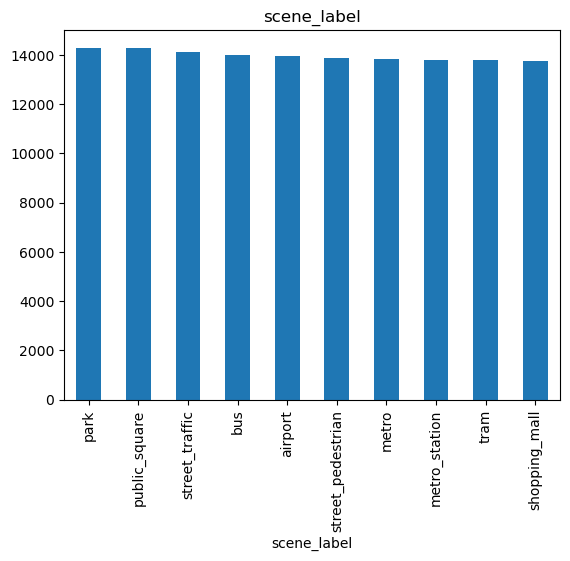

In [ ]:
#Plot of values for scene_label
df2['scene_label'].value_counts().plot.bar()
plt.title('scene_label')
plt.show()


In [ ]:
#Percentage of data split
split = round(((df2['scene_label'].count()/pd['scene_label'].count())*100))

print(f'Evaluate fold represents {split}% of the data')

Evaluate fold represents 61% of the data


# Data Analysis of fold1_evaluate.csv

This markdown cell provides information about the `fold1_evaluate.csv` file in the TAU-urban-acoustic-scenes-2022-mobile-development evaluation setup.

The `fold1_evaluate.csv` file contains evaluation data for urban acoustic scenes, including information about the scene label.

## Basic Information

- File Path: `/data/TAU-urban-acoustic-scenes-2022-mobile-development/evaluation_setup/fold1_evaluate.csv`
- Separator: `\t`

## Data Analysis (scene label)

- Number of Counts: 29679
- Number of Unique: 10


### Scene Label Distribution

The bar plot below represents the distribution of scene labels in the `fold1_evaluate.csv` file:


In [ ]:
df3 = pd.read_csv('/home/rodjuabu/DCASE-Task1/data/TAU-urban-acoustic-scenes-2022-mobile-development/evaluation_setup/fold1_evaluate.csv',sep = '\t')
df3.head(10)

,filename,scene_label
0,audio/airport-barcelona-203-6129-0-a.wav,airport
1,audio/airport-barcelona-203-6129-1-a.wav,airport
2,audio/airport-barcelona-203-6129-2-a.wav,airport
3,audio/airport-barcelona-203-6129-3-a.wav,airport
4,audio/airport-barcelona-203-6129-4-a.wav,airport
5,audio/airport-barcelona-203-6129-5-a.wav,airport
6,audio/airport-barcelona-203-6129-6-a.wav,airport
7,audio/airport-barcelona-203-6129-7-a.wav,airport
8,audio/airport-barcelona-203-6129-8-a.wav,airport
9,audio/airport-barcelona-203-6129-9-a.wav,airport


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29680 entries, 0 to 29679
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     29680 non-null  object
 1   scene_label  29680 non-null  object
dtypes: object(2)
memory usage: 463.9+ KB


In [ ]:
df3.describe()

,filename,scene_label
count,29680,29680
unique,29680,10
top,audio/tram-lisbon-1200-45650-9-s6.wav,bus
freq,1,2970


In [ ]:
#Values for column "scene_label"
print(df3['scene_label'].value_counts())

scene_label
bus                  2970
metro                2970
shopping_mall        2970
metro_station        2970
park                 2970
public_square        2970
street_traffic       2970
street_pedestrian    2970
airport              2960
tram                 2960
Name: count, dtype: int64


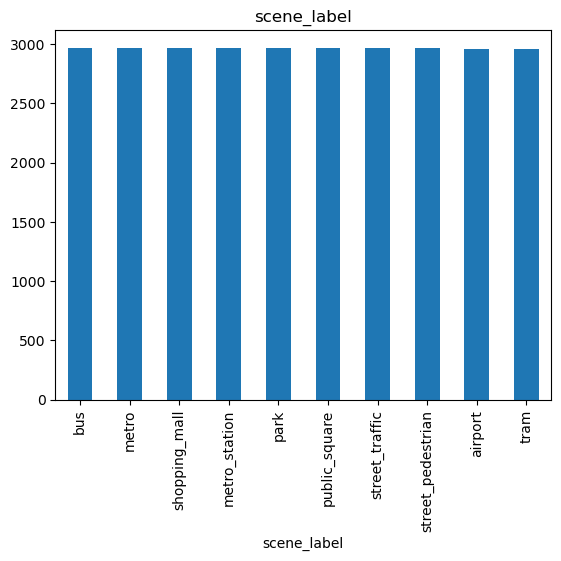

In [ ]:
#Plot of values for scene_label
df3['scene_label'].value_counts().plot.bar()
plt.title('scene_label')
plt.show()


In [ ]:
#Percentage of data split
split = round(((df3['scene_label'].count()/pd['scene_label'].count())*100))

print(f'Evaluate fold represents {split}% of the data')



230350
Evaluate fold represents 13% of the data


In [60]:
df4 = pd.read_csv('data/TAU-urban-acoustic-scenes-2022-mobile-development/evaluation_setup/fold1_test.csv',sep = '\t')

AttributeError: 'DataFrame' object has no attribute 'read_csv'